In [7]:
## install new packages
# import sys
# !conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PK\Anaconda3\envs\tf-gpu

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-0.14.1-py_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.22.1-py37h6288b17_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
#standard import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
sns.set(style="whitegrid")
import tensorflow as tf
from tensorflow.keras import models , layers

# Part 1+2 Fundamental Deep Learning

## What is deep learning

Information goes through successive filters
and comes out increasingly purified. Example of deep learning by digit classification 

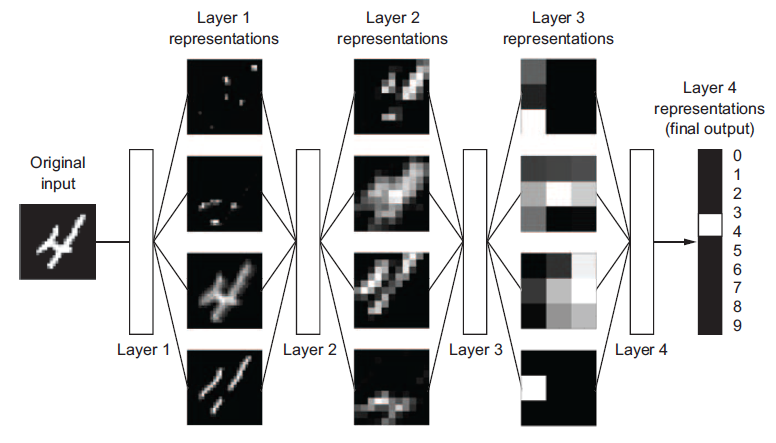

"Learning" means finding a set of values for the weights of all layers in a network, such that the
network will correctly map example inputs to their associated targets. To measure performance, The loss function takes the predictions of the network and the target variable and computes a distance score, capturing
how well the network has done.

Then use this score as a feedback signal to
adjust the value of the weights a little, in a direction that will lower the loss score, called the Backpropagation.

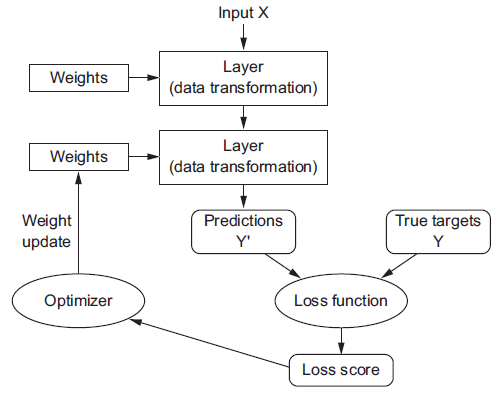

# Part 3 Neural networks

## Training a neural network revolves around the following objects:

-  *Layers*, which are combined into a network (or model)
-  The *input data* and corresponding targets
-  The *loss function*, which defines the feedback signal used for learning
-  The *optimizer*, which determines how learning proceeds

**Layers**   
Different layers are appropriate for different types of data processing.  
Simple vector data, stored in 2D tensors of shape (samples,
features), is often processed by ***densely connected layers***, also called fully connected or dense
layers (the Dense class in Keras). 

Sequence data, stored in 3D tensors of shape (samples,
timesteps, features), is typically processed by ***recurrent layers*** such as an LSTM layer.

Image data, stored in 4D tensors, is usually processed by ***2D convolution layers*** (Conv2D).

In [3]:
# code example of A dense layer with 32 output units only accept as input 2D tensors where the first dimension is 784
from tensorflow.keras import models,layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

**Loss functions and optimizers: keys to configuring the learning process**

- Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

Common Loss function  

Use Binary crossentropy for a two-class classification
problem, categorical crossentropy for a many-class classification problem, meansquared
error for a regression problem, connectionist temporal classification (CTC)
for a sequence-learning problem, and so on

## Intro to Keras

Typical workflow  

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the $fit$( ) method of your model.

## Classifying movie reviews: a binary classification example


In [25]:
from tensorflow import keras
keras.__version__
# import imdb data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # limit 10k word per observation

### Preprocess into tensor

In [26]:
# convert list of integer into tensor (matrix with same length) (One hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [27]:
# We should also vectorize our labels (convert to float) since only 2 label no need to convert
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building network

In [46]:
model = models.Sequential()
model.add(layers.Dense(16,activation= 'relu', input_shape = (10000,))) # shape for each observation
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

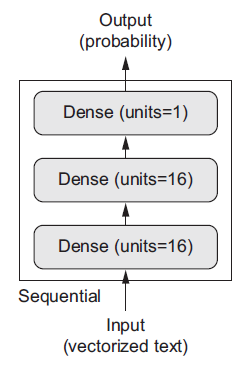

In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. relu is the
most popular activation function in deep learning, but there are many other candidates,
which all come with similarly strange names: prelu, elu, and so on.

#### Choose optimizer and loss function

In [60]:
model.compile(optimizer='rmsprop', # gradient-based optimization technique
             loss= 'binary_crossentropy', #best for binary classification
             metrics=['accuracy']) # assess accuracy

or we can customize our own optimizers (set learning rate) and pass optimizer class

In [54]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Set custom loss and metrics

In [55]:
from tensorflow.keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### Training model

In [59]:
# set aside validating data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart with validation_data argument.

In [61]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size= 512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.5331 - accuracy: 0.7900 - val_loss: 0.3998 - val_accuracy: 0.8652
Epoch 2/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.3144 - accuracy: 0.8988 - val_loss: 0.3074 - val_accuracy: 0.8853
Epoch 3/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.2292 - accuracy: 0.9239 - val_loss: 0.3074 - val_accuracy: 0.8772
Epoch 4/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1800 - accuracy: 0.9422 - val_loss: 0.3073 - val_accuracy: 0.8769
Epoch 5/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1460 - accuracy: 0.9523 - val_loss: 0.2820 - val_accuracy: 0.8900
Epoch 6/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1214 - accuracy: 0.9604 - val_loss: 0.2992 - val_accuracy: 0.8815
Epoch 7/20
15000/15000 [==============================]

dictionary containing data about everything that happened
during training

In [62]:
history_dict = history.history

In [63]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plot the train and validation loss

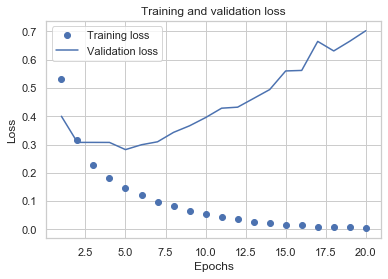

In [70]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

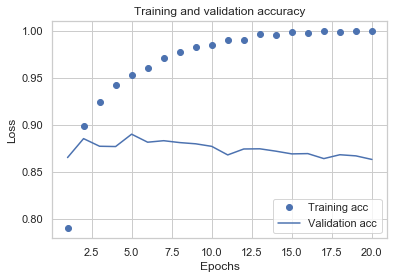

In [71]:
plt.clf()   # clear figure
acc_values =  history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of a model that performs better on the training data than validation data (overfitting)

In [74]:
# retrain with fewer epochs
model.fit(x_train, y_train, epochs=4, batch_size=512)
# evaluation 
model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.2244 - accuracy: 0.9457
Epoch 2/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.1365 - accuracy: 0.9606
Epoch 3/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.1056 - accuracy: 0.9682
Epoch 4/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.5028 - accuracy: 0.8565


[0.5027753525805473, 0.85648]

#### Predict on new data

In [75]:
model.predict(x_test)

array([[0.02159486],
       [1.        ],
       [0.86768514],
       ...,
       [0.09701111],
       [0.05464477],
       [0.5937943 ]], dtype=float32)

##  Classifying newswires:a multiclass classification example
classify Reuters newswires into 46 mutually
exclusive topics. And because each data point should be classified into only one category,
the problem is more specifically an instance of single-label, multiclass classification.

In [77]:
# import data
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [96]:
len(train_data) ,len(test_data)

(8982, 2246)

### Preprocess into tensor

In [178]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [179]:
# Since multiclass need to one hot label
y_train = vectorize_sequences(train_labels,dimension=46)
y_test = vectorize_sequences(test_labels,dimension=46)
# or use keras build-in
from tensorflow.keras.utils import to_categorical
(y_train == to_categorical(train_labels,num_classes = 46)).all() # same thing

True

### Building network

16-dimensional intermediate layers, but a 16-dimensional space may
be too limited to learn to separate 46 different classes: such small layers may act as information
bottlenecks, permanently dropping relevant information.
For this reason you’ll use larger layers. Let’s go with 64 units.

In [180]:
model = models.Sequential()
model.add(layers.Dense(64,'relu',(10000,)))
model.add(layers.Dense(64,'relu'))
model.add(layers.Dense(46,activation='softmax')) #the network will output a 46-dimensional vector

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution
output by the network and the true distribution of the labels. By minimizing
the distance between these two distributions, you train the network to output something
as close as possible to the true labels.

In [181]:
model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics=['accuracy'])

In [182]:
# set validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Training model

In [183]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 99us/sample - loss: 2.4558 - accuracy: 0.4979 - val_loss: 1.6537 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 0s 55us/sample - loss: 1.3788 - accuracy: 0.7083 - val_loss: 1.3031 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 0s 54us/sample - loss: 1.0467 - accuracy: 0.7735 - val_loss: 1.1379 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 0s 61us/sample - loss: 0.8259 - accuracy: 0.8183 - val_loss: 1.0384 - val_accuracy: 0.7670
Epoch 5/20
7982/7982 [==============================] - 0s 59us/sample - loss: 0.6606 - accuracy: 0.8534 - val_loss: 0.9682 - val_accuracy: 0.7860
Epoch 6/20
7982/7982 [==============================] - 0s 59us/sample - loss: 0.5323 - accuracy: 0.8872 - val_loss: 0.9333 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 0s 60us/sample

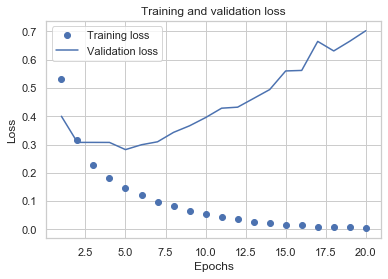

In [184]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

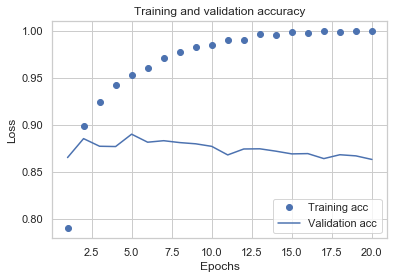

In [185]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 5 epochs. Let's train a new network from scratch for 5 epochs, then let's evaluate it on the test set:



In [198]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=6,
         batch_size=512,
         validation_data=(x_val,y_val))
result = model.evaluate(x_test,y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/6
7982/7982 [==============================] - 0s 60us/sample - loss: 0.0830 - accuracy: 0.9592 - val_loss: 1.4193 - val_accuracy: 0.7840
Epoch 2/6
7982/7982 [==============================] - 0s 54us/sample - loss: 0.0855 - accuracy: 0.9572 - val_loss: 1.3448 - val_accuracy: 0.7870
Epoch 3/6
7982/7982 [==============================] - 0s 56us/sample - loss: 0.0800 - accuracy: 0.9600 - val_loss: 1.3343 - val_accuracy: 0.7910
Epoch 4/6
7982/7982 [==============================] - 0s 59us/sample - loss: 0.0822 - accuracy: 0.9595 - val_loss: 1.4472 - val_accuracy: 0.7750
Epoch 5/6
7982/7982 [==============================] - 0s 56us/sample - loss: 0.0805 - accuracy: 0.9587 - val_loss: 1.3743 - val_accuracy: 0.7830
Epoch 6/6
2246/2246 [==============================] - 0s 62us/sample - loss: 1.6066 - accuracy: 0.7760


In [200]:
'validation loss is',result[0],'accuracy is',result[1]

('validation loss is', 1.6066499541937402, 'accuracy is', 0.7760463)

Wrapping up  
- Dense layer of size must be larger than label classes to able to handle information  
- There are two ways to handle labels in multiclass classification:  
    - Encoding the labels via categorical encoding (also known as one-hot encoding)and using *categorical_crossentropy* as a loss function  
    -  Encoding the labels as integers and using the *sparse_categorical_crossentropyloss* function

## Predicting House price (Regression with small amount of data)

In [9]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data.shape #data is very small

(404, 13)

### Prepare data

It would be problematic to feed into a neural network values that all take wildly different
ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. Lets Standardize

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

### Building model
Because so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units. In general, the less training data you have, the worse overfitting
will be, and using a small network is one way to mitigate overfitting.

In [11]:
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [13]:
# validation with K-fold validation (4)
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
all_scores , 'average score',np.mean(all_scores)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


([3.0582764, 3.081179, 3.6017613, 3.7831492], 'average score', 3.3810916)

This time increase to 500 epochs and keep a record of how
well the model does at each epoch (MAE) so that we can plot to find the optimal epochs

In [15]:
from tensorflow.keras import backend as K
K.clear_session()# Some memory clean-up
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
#We can then compute the average of the per-epoch MAE scores for all folds:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


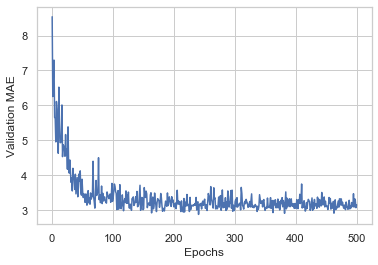

In [17]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Replace each point with an exponential moving average of the previous points, to obtain a smooth curve more easy to interpret

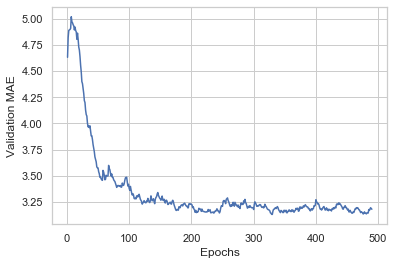

In [18]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.



### Train final model

In [25]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=220, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/sample - loss: 26.0160 - mae: 3.4895


In [26]:
test_mae_score

3.4895327

# Part 4 Technique in Machine learning  

In [44]:
# prepare data for original model
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
original_hist = original_model.fit(x_train, y_train,epochs=20,batch_size=512,validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 83us/sample - loss: 0.4308 - acc: 0.8301 - val_loss: 0.3189 - val_acc: 0.8818
Epoch 2/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.2437 - acc: 0.9126 - val_loss: 0.2829 - val_acc: 0.8899
Epoch 3/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.1924 - acc: 0.9307 - val_loss: 0.2963 - val_acc: 0.8811
Epoch 4/20
25000/25000 [==============================] - 2s 71us/sample - loss: 0.1610 - acc: 0.9432 - val_loss: 0.3084 - val_acc: 0.8792
Epoch 5/20
25000/25000 [==============================] - 2s 69us/sample - loss: 0.1383 - acc: 0.9507 - val_loss: 0.3208 - val_acc: 0.8771
Epoch 6/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.1224 - acc: 0.9572 - val_loss: 0.3735 - val_acc: 0.8649
Epoch 7/20
25000/25000 [==============================] - 2s 67us/sample - loss: 0.1080 - acc: 0.9633 - val_loss: 0.

In [47]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

## Reduce Overfitting in Neural Network

### Reducing the network’s size (number of layers and the number of units per layer)
a model with
more parameters has more memorization capacity and therefore can easily learn a perfect
dictionary-like mapping between training samples and their targets—a mapping
without any generalization power.

At the same, models should have enough parameters that they
don’t underfit:shouldn’t be starved for memorization resources.

In [64]:
# reduce each network size from 16 to 4
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
smaller_model_hist = smaller_model.fit(x_train, y_train, epochs=20,batch_size=512, validation_data=(x_test, y_test))
smaller_model_val_loss = smaller_model_hist.history['val_loss']

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 77us/sample - loss: 0.5861 - acc: 0.6893 - val_loss: 0.5289 - val_acc: 0.7909
Epoch 2/20
25000/25000 [==============================] - 2s 66us/sample - loss: 0.4835 - acc: 0.8477 - val_loss: 0.4799 - val_acc: 0.8529
Epoch 3/20
25000/25000 [==============================] - 2s 65us/sample - loss: 0.4332 - acc: 0.8958 - val_loss: 0.4542 - val_acc: 0.8671
Epoch 4/20
25000/25000 [==============================] - 2s 64us/sample - loss: 0.3961 - acc: 0.9202 - val_loss: 0.4442 - val_acc: 0.8640
Epoch 5/20
25000/25000 [==============================] - 2s 66us/sample - loss: 0.3655 - acc: 0.9351 - val_loss: 0.4330 - val_acc: 0.8696
Epoch 6/20
25000/25000 [==============================] - 2s 67us/sample - loss: 0.3373 - acc: 0.9470 - val_loss: 0.4321 - val_acc: 0.8686
Epoch 7/20
25000/25000 [==============================] - 2s 77us/sample - loss: 0.3108 - acc: 0.9540 - val_loss: 0.

### Adding weight regularization
put constraints on the complexity
of a network by forcing its weights to take only small values, which makes the
distribution of weight values more regular. Using imdb example

l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 *
weight_coefficient_value to the total loss of the network. Note that because this
penalty is only added at training time, the loss for this network will be much higher at
training than at test time.

In [45]:
# passing weight regularizer instances to layers as keyword arguments
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.1), input_shape= (10000,)))
model.add(layers.Dense(16,activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.1)))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [28]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy',metrics=['acc'])
l2_model_hist = model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))
l2_model_val_loss = l2_model_hist.history['val_loss']

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 92us/sample - loss: 2.2493 - acc: 0.7297 - val_loss: 1.7526 - val_acc: 0.7998
Epoch 2/20
25000/25000 [==============================] - 2s 70us/sample - loss: 1.5661 - acc: 0.8001 - val_loss: 1.4006 - val_acc: 0.7873
Epoch 3/20
25000/25000 [==============================] - 2s 69us/sample - loss: 1.2650 - acc: 0.8018 - val_loss: 1.1423 - val_acc: 0.7981
Epoch 4/20
25000/25000 [==============================] - 2s 68us/sample - loss: 1.0365 - acc: 0.8115 - val_loss: 0.9764 - val_acc: 0.7145
Epoch 5/20
25000/25000 [==============================] - 2s 68us/sample - loss: 0.8765 - acc: 0.8058 - val_loss: 0.8151 - val_acc: 0.8090
Epoch 6/20
25000/25000 [==============================] - 2s 69us/sample - loss: 0.7701 - acc: 0.8078 - val_loss: 0.7335 - val_acc: 0.8044
Epoch 7/20
25000/25000 [==============================] - 2s 72us/sample - loss: 0.7025 - acc: 0.8142 - val_loss: 0.

### Adding dropout

After applying dropout, output vector from each layers will have a few zero entries
distributed at random. The dropout rate is the fraction
of the features that are zeroed out; it’s usually set between 0.2 and 0.5.   
At test time, no
units are dropped out; instead, the all layer’s output values are scaled down by a factor
equal to the dropout rate, to balance for the fact that more units are active than at
training time.

The core idea is that introducing noise in the output values of a layer can
break up happenstance patterns that aren’t significant

In [76]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
dpt_model_val_loss = dpt_model_hist.history['val_loss']

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 86us/sample - loss: 0.5983 - acc: 0.6709 - val_loss: 0.4529 - val_acc: 0.8602
Epoch 2/20
25000/25000 [==============================] - 2s 70us/sample - loss: 0.4410 - acc: 0.8119 - val_loss: 0.3394 - val_acc: 0.8766
Epoch 3/20
25000/25000 [==============================] - 2s 71us/sample - loss: 0.3496 - acc: 0.8647 - val_loss: 0.2920 - val_acc: 0.8875
Epoch 4/20
25000/25000 [==============================] - 2s 68us/sample - loss: 0.2970 - acc: 0.8911 - val_loss: 0.2776 - val_acc: 0.8890
Epoch 5/20
25000/25000 [==============================] - 2s 71us/sample - loss: 0.2596 - acc: 0.9070 - val_loss: 0.2802 - val_acc: 0.8890
Epoch 6/20
25000/25000 [==============================] - 2s 76us/sample - loss: 0.2263 - acc: 0.9214 - val_loss: 0.2968 - val_acc: 0.8841
Epoch 7/20
25000/25000 [==============================] - 2s 82us/sample - loss: 0.2042 - acc: 0.9259 - val_loss: 0.

In [77]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

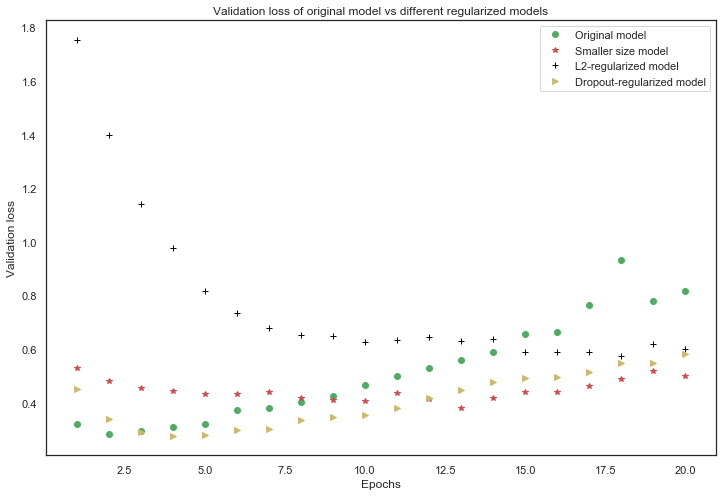

In [85]:
sns.set_style("white")
fig= plt.figure(figsize=(12,8))

plt.plot(epochs, original_val_loss,'bo', color = 'g' , label='Original model')
plt.plot(epochs, smaller_model_val_loss, '*',color = 'r', label='Smaller size model')
plt.plot(epochs, l2_model_val_loss, 'b+',color = 'black',label='L2-regularized model')
plt.plot(epochs, dpt_model_val_loss, '>',color = 'y', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss of original model vs different regularized models')
plt.legend()
plt.show()

### Sumamry

- the smaller size network starts overfitting later than the reference network and its performance degrades more slowly once it starts overfitting.
- L2 regularization has become much more resistant to overfitting than the reference model , even though both models have the same number of parameters.
- Drop-out start overfitting later a bit later than original model while following its pattern closely

## Choosing activation and loss function for your model

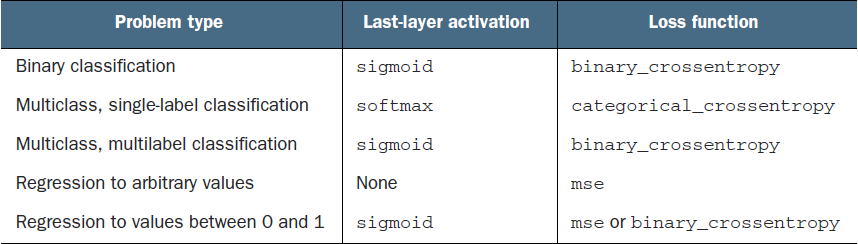

# Part 5 Computer vision

# Part 6 Text and sequences

Tokenization (Break down text) can happen in 3 ways
- Segment in to words
- Segment in to characters
- Extract n-grams of words or characters (N-grams are overlapping groups of multiple consecutive words or characters.)  

Then Vectorizing text into numeric tensors. (by one-hot
encoding or word embedding)

In [5]:
# keras fri one hot codeing
from tensorflow.keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # only take into account the 1,000 most common words
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


**Word embeddings**  
word embeddings are lowdimensional floating-point vectors that are learned from data  
Two ways
- Learn word embeddings jointly with the main task. In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network.
- Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying to solve. These are called **pretrained word embeddings**.

When you instantiate an Embedding layer, its weights (its internal dictionary of
token vectors) are initially random, just as with any other layer. During training, these
word vectors are gradually adjusted via backpropagation, structuring the space into
something the downstream model can exploit. Once fully trained, the embedding
space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

In [8]:
# The Embedding layer takes at least two arguments: the number of possible tokens (here, 1,000: 1 + maximum word index) 
# and the dimensionality of the embeddings (here, 64).
embedding_layer = layers.Embedding(1000,64)

## Apply to IMDB movie review sentiment prediction

restrict the
movie reviews to the top 10,000 most common words and cut off the reviews after only 20 words. The network will
learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer
sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the
tensor to 2D, and train a single Dense layer on top for classification.

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 1000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen) # Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

/data/prepaid/setup/envs/sandbox_env/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/data/prepaid/setup/envs/sandbox_env/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train,epochs=10,batch_size=32,validation_split=0.2,verbose =0)

In [11]:
np.array(history.history['val_loss']).mean()

0.5456116199493408

### apply pretrain word embedding with raw text data

In [14]:
import os
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


page 190

page 196

## Recurrent neural networks